# HomeWork 3

## Md. Abdullah-Al Mamun

### 1.	Suppose we have rooms we have a dataset that shows the number of bedrooms and the selling price for 20 houses in a particular neighborhood
##### Bedrooms = [1,1,1,2,2,2,2,3,3,3,3,3,3,3,4,4,4,5,5,6]
##### Prices = [120,133,139,185,148,160,192,205,244,213,236,280,275,273,312,311,304,415,396,488]

### 2.	Using the Bedrooms data points:
##### ○	Extract a random sample of size 10
##### ○	Compute the mean and standard deviation of the sample
##### ○	Compute the the mean of the population
##### ○	Compute the confidence interval of 95% using the sample 
##### ○	Check if the population mean lies between the upper and lower bounds of the interval

 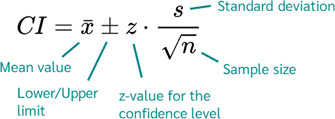


In [1]:
# library

import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Data

Bedrooms = [1,1,1,2,2,2,2,3,3,3,3,3,3,3,4,4,4,5,5,6]
Prices = [120,133,139,185,148,160,192,205,244,213,236,280,275,273,312,311,304,415,396,488]

### Extract a random sample of size 10

In [3]:
random_sample =  random.sample(Bedrooms, k=10)
random_sample

[3, 3, 2, 1, 4, 3, 5, 2, 4, 3]

### Compute the mean and standard deviation of the sample

In [4]:
sample_mean = np.mean(random_sample)
print("The mean of the sample: {:.2f}".format(sample_mean))

sample_std = np.std(random_sample, ddof=1)
print("The standard deviation of the sample: {:.2f}".format(sample_std))

The mean of the sample: 3.00
The standard deviation of the sample: 1.15


### Compute the the mean of the population

In [5]:
population_mean = np.mean(Bedrooms)
print("Population mean: {:.2f}".format(population_mean))  

Population mean: 3.00


## Compute the confidence interval of 95% using the sample


In [6]:
from scipy.stats import norm

def confidence_interval(random_sample, confidence=0.95):
    n = len(random_sample)
    
    z_score = norm.ppf((1 + confidence) / 2) # The 1 and 2 in the equation refer to 1 + confidence and 2 respectively, 
                                             # which are used to calculate the quantile of the standard normal distribution.
    std_error = np.std(Bedrooms, ddof=1) / np.sqrt(n)    
    sample_mean = np.mean(Bedrooms)
    
    lower_bound = sample_mean - z_score * std_error
    upper_bound = sample_mean + z_score * std_error
    
    return lower_bound, upper_bound


confidence_interval=confidence_interval(Bedrooms)
print("The confidence interval of 95% using the sample: {}".format(confidence_interval))

The confidence interval of 95% using the sample: (2.396735814298603, 3.603264185701397)


### Check if the population mean lies between the upper and lower bounds of the interval

In [7]:
lower_bound =confidence_interval[0]
upper_bound = confidence_interval[1]

if lower_bound <= population_mean <= upper_bound:
    print("The population mean {:.2f} lies between the lower bound {:.2f} and upper bounds {:.2f} of the interval.".format(population_mean, lower_bound, upper_bound ))
else:
    print("The population mean {:.2f} lies outside the lower bound {:.2f} and upper bounds {:.2f} of the interval.".format(population_mean, lower_bound, upper_bound ))

The population mean 3.00 lies between the lower bound 2.40 and upper bounds 3.60 of the interval.


# 3.	Using both of the Bedrooms and the Prices:
#### ○	Compute the covariance and the correlation between the two variables
#### ○	Build a regression model and estimate the regression parameters (slope and intercept).
#### ○	Predict the house price for a house with 7 rooms
#### ○	Estimate the upper bound and the lower bounds of the prediction interval of a house with 7 rooms
##### ■	Alpha = 0.1
##### ■	N = 20
##### ■	Df = N-2
### Compute the covariance and the correlation between the two variables

In [8]:
df = pd.DataFrame({'Bedrooms': Bedrooms, 'Prices': Prices})

# covariance
covariance = df.cov()
print("Covariance between Bedrooms and Prices:\n{}".format(covariance))

print()

# correlation
correlation = df.corr()
print("Correlation between Bedrooms and Prices:\n{}".format(correlation)) 

Covariance between Bedrooms and Prices:
            Bedrooms        Prices
Bedrooms    1.894737    133.894737
Prices    133.894737  10016.155263

Correlation between Bedrooms and Prices:
          Bedrooms    Prices
Bedrooms  1.000000  0.971938
Prices    0.971938  1.000000


##### Correlation between Bedrooms and Prices using heatmap

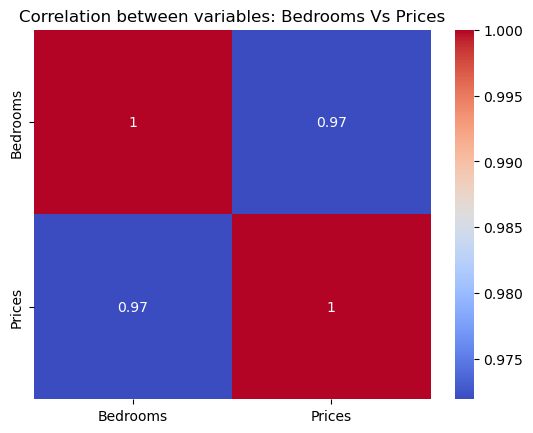

In [9]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation between variables: Bedrooms Vs Prices")
plt.show()

### Build a regression model and estimate the regression parameters (slope and intercept).

In [10]:
from sklearn.linear_model import LinearRegression

# Reshape the data
X = np.array(Bedrooms).reshape((-1, 1))
y = np.array(Prices)

# Linear Regression 
model = LinearRegression()

# fit the model to the data
model.fit(X, y)

# Estimate the regression parameters (slope and intercept)
slope = model.coef_[0]
intercept = model.intercept_

print("Slope: {:.2f}".format(slope))
print("Intercept: {:.2f}".format(intercept))

Slope: 70.67
Intercept: 39.45


In [11]:
model.coef_[0]

70.6666666666667

## Predict the house price for a house with 7 rooms

In [12]:
num_of_rooms = 7
predicted_price = slope * num_of_rooms + intercept  # linear equation, y = mx + b

print("Predicted price for a house with {} rooms: {:.2f}".format(num_of_rooms, predicted_price))

Predicted price for a house with 7 rooms: 534.12


### Estimate the upper bound and the lower bounds of the prediction interval of a house with 7 rooms
#### ■ Alpha = 0.1
#### ■ N = 20
#### ■ Df = N-2

In [13]:
from scipy.stats import t


def predict_interval(x, model, alpha=0.1, N=20): # x= number of rooms, N = sample size, 
    # standard error
    x_mean = np.mean(X)
    y_mean = np.mean(y)
    y_pred = model.predict(X)
    resid = y - y_pred
    SSE = np.sum(resid**2)  #Sum of Squared Errors
    sse_mean = SSE / (N-2)
    sse_x = sse_mean * (1/N + (x-x_mean)**2/np.sum((X-x_mean)**2))
    std_error = np.sqrt(sse_x)

    # the t-score for alpha and degrees of freedom
    t_score = t.ppf(1 - alpha/2, N-2)

    # the prediction interval calculation
    y_hat = model.predict([[x]])[0]
    
    lower_bound = y_hat - t_score * std_error
    upper_bound = y_hat + t_score * std_error

    return (lower_bound, upper_bound)


(lower, upper) = predict_interval(7, model, alpha=0.1, N=20)
print("Predicted price {:.2f} for a house with 7 rooms are in : [{:.2f}, {:.2f}] intervals".format(predicted_price, lower, upper))

Predicted price 534.12 for a house with 7 rooms are in : [504.62, 563.61] intervals


### 4.  Using as sample of houses that have only 3 bedrooms 
### 5.	Try to find the lower price that can be payed for a house with 3 rooms using Tolerance interval

In [14]:
from scipy.stats import t

# Extracting sample of houses with 3 bedrooms
three_bedrooms = [p for b, p in zip(Bedrooms, Prices) if b == 3]

#  mean and standard deviation of Prices
mean_price = np.mean(three_bedrooms)
std_dev_price = np.std(three_bedrooms, ddof=1)

alpha = 0.05
n = len(three_bedrooms)
df = n - 1
k2 = 2.447    # two- one sided tolerance interval 

# the lower and upper bounds
lower_bound = mean_price - k2 * (std_dev_price / np.sqrt(n))
upper_bound = mean_price + k2 * (std_dev_price / np.sqrt(n))

print("The lower price {:.2f}€ that can be payed for a house with 3 rooms using Tolerance interval [{:.2f}, {:.2f}]".format(lower_bound, lower_bound, upper_bound))


The lower price 218.32€ that can be payed for a house with 3 rooms using Tolerance interval [218.32, 274.82]


### 6.	Try  to find the highest price that can be payed for a house with 3 rooms using Tolerance interval

In [15]:
print("The highest price {:.2f}€ that can be payed for a house with 3 rooms using Tolerance interval [{:.2f}, {:.2f}]".format(upper_bound, lower_bound, upper_bound))

The highest price 274.82€ that can be payed for a house with 3 rooms using Tolerance interval [218.32, 274.82]


## Some Extra stuff:
#### Try to use these Formulas as well and compare the results

### We use the following formula to calculate a confidence interval:
#### ŷ0  +/-  tα/2,n-2 * Syx√((x0 – x̄)2/SSx + 1/n)
#### We use the following formula to calculate a prediction interval:
#### ŷ0  +/-  tα/2,n-2 * Syx√((x0 – x̄)2/SSx + 1/n + 1)
##### where:
#####  ●	ŷ0: Estimated mean value of response variable
#####  ●	tα/2,n-2: t-critical value with n-2 degrees of freedom
##### ●	Syx: Standard error of response variable
##### ●	x0: specific value of predictor variable 
##### ●	x̄: mean value of predictor variable
##### ●	SSx: Sum of squares for predictor variable
##### ●	n: Total sample size


## calculate a confidence interval:

In [17]:
from scipy import stats
import math

def confidence_interval(x, y, x0, alpha=0.05):
    
    # size of input variable
    n = len(x)
    
    # Calculating the mean of variable x and y
    x_mean = sum(x) / n
    y_mean = sum(y) / n
    
    # Calculating the covariance between x and y 
    xy_cov = sum([(xi - x_mean) * (yi - y_mean) for xi, yi in zip(x, y)])
    
    # Calculating the variance of variable x
    x_var = sum([(xi - x_mean) ** 2 for xi in x])
    
    # the slope of the regression line
    b1 = xy_cov / x_var
    
    # Calculating the intercept of the regression line 
    b0 = y_mean - b1 * x_mean
    
    # Calculating the predicted value of y for a given x0
    y0 = b0 + b1 * x0
    
    # the mean squared error
    mse = sum([(yi - (b0 + b1 * xi)) ** 2 for xi, yi in zip(x, y)]) / (n - 2)
    
    # Calculating the sum of squares of x
    ssx = sum([(xi - x_mean) ** 2 for xi in x])
    
    # Calculating the standard error of the estimate
    s_yx = np.sqrt(mse)
    
    # Calculating the t-statistic
    t = abs(stats.t.ppf(alpha / 2, n - 2))   
       
    
    # Calculating the lower and upper bounds of the confidence interval
    lower_bound = y0 - t * s_yx * math.sqrt((x0 - x_mean) ** 2 / ssx + 1 / n)
    upper_bound = y0 + t * s_yx * math.sqrt((x0 - x_mean) ** 2 / ssx + 1 / n)
    
    # Returning the lower and upper bounds of the confidence interval
    
    return lower_bound,  upper_bound # ŷ0  +/-  tα/2,n-2 * Syx√((x0 – x̄)2/SSx + 1/n)


# number of rooms =7
x0=7
lower_bound, upper_bound = confidence_interval(Bedrooms, Prices, x0, alpha= 0.1)

print("The 90% confidence interval for a house with {} bedrooms is [{:.2f}, {:.2f}]".format(x0, lower_bound, upper_bound))

The 90% confidence interval for a house with 7 bedrooms is [504.62, 563.61]


## calculation of prediction interval

In [18]:
from scipy import stats

def prediction_interval(x, y, x0, alpha=0.05):
    
    # size of input variable
    n = len(x)
    
    # Calculating the mean of variable x and y
    x_mean = sum(x) / n
    y_mean = sum(y) / n
    
    # Calculating the covariance between x and y 
    xy_cov = sum([(xi - x_mean) * (yi - y_mean) for xi, yi in zip(x, y)])
    
    # Calculating the variance of variable x
    x_var = sum([(xi - x_mean) ** 2 for xi in x])
    
    # the slope of the regression line
    b1 = xy_cov / x_var
    
    # Calculating the intercept of the regression line 
    b0 = y_mean - b1 * x_mean
    
    # Calculating the predicted value of y for a given x0
    y0 = b0 + b1 * x0
    
    # the mean squared error
    mse = sum([(yi - (b0 + b1 * xi)) ** 2 for xi, yi in zip(x, y)]) / (n - 2)
    
    # Calculating the sum of squares of x
    ssx = sum([(xi - x_mean) ** 2 for xi in x])
    
    # Calculating the standard error of the estimate
    s_yx = np.sqrt(mse)
    
    # Calculating the t-statistic
    t = abs(stats.t.ppf(alpha / 2, n - 2))    
    
    # calculating lower bound and upper bound of the prediction interval
    lower_bound = (y0 - t * s_yx * math.sqrt((x0 - x_mean) ** 2 / ssx + 1 + (1/n)))
    upper_bound = (y0 + t * s_yx * math.sqrt((x0 - x_mean) ** 2 / ssx + 1 + (1/n)))
    
    # Returning the lower and upper bounds of the prediction interval
    
    return  lower_bound, upper_bound  #ŷ0  +/-  tα/2,n-2 * Syx√((x0 – x̄)2/SSx + 1/n + 1)

# number of rooms =7
x0=7
lower_bound, upper_bound =prediction_interval(Bedrooms, Prices, x0, alpha= 0.1)

print("The 90% prediction_interval for a house with {} bedrooms is [{:.2f}, {:.2f}]".format(x0, lower_bound, upper_bound))

The 90% prediction_interval for a house with 7 bedrooms is [482.84, 585.39]
